β0 = 62.4054
β1 = 1.5511
β2 = 0.5102
β3 = 0.1019
β4 = -0.1441


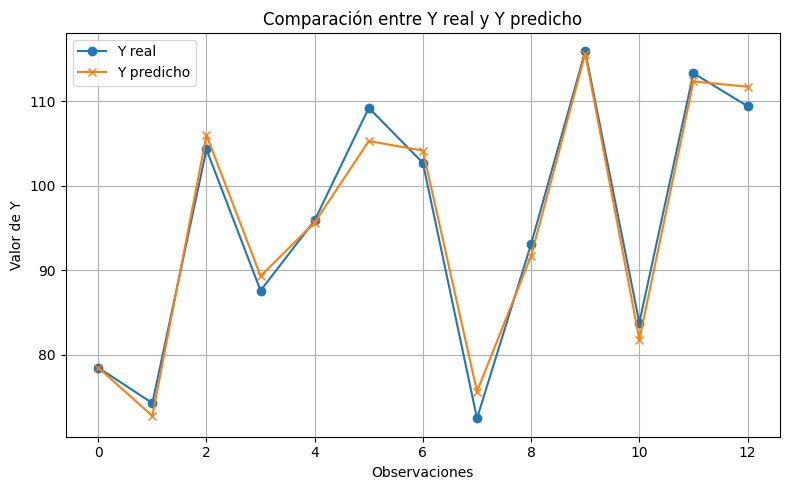

El valor predicho de Y para X1=23, X2=13, X3=77, X4=55 es: 104.64


,Y,X1,X2,X3,X4
0,78.5,7,26,6,60
1,74.3,1,29,15,52
2,104.3,11,56,8,20
3,87.6,11,31,8,47
4,95.9,7,52,6,33
5,109.2,11,55,9,22
6,102.7,3,71,17,6
7,72.5,1,31,22,44
8,93.1,2,54,18,22
9,115.9,21,47,4,26


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Ingresar los datos en un DataFrame
#data = {
df = pd.DataFrame(
    {
    'Y': [78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 72.5, 93.1, 115.9, 83.8, 113.3, 109.4],
    'X1': [7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10],
    'X2': [26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68],
    'X3': [6, 15, 8, 8, 6, 9, 17, 22, 18, 4, 23, 9, 8],
    'X4': [60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12, 12]
}
)

#df = pd.DataFrame(data)

# Paso 2: Construir la matriz X (con columna de 1s) y vector Y
X = np.column_stack((np.ones(len(df)), df[['X1', 'X2', 'X3', 'X4']]))
y = df['Y'].values.reshape(-1, 1)

# Paso 3: Aplicar la fórmula: β = (X'X)^(-1) X'y
XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
Xty = X.T @ y
beta = XtX_inv @ Xty

# Paso 4: Mostrar los coeficientes
for i, b in enumerate(beta):
    print(f"β{i} = {b[0]:.4f}")


# Paso 4: Obtener predicciones del modelo
y_pred = X @ beta

# Paso 5: Graficar Y real vs Y predicho
plt.figure(figsize=(8, 5))
plt.plot(y, label='Y real', marker='o')
plt.plot(y_pred, label='Y predicho', marker='x')
plt.title('Comparación entre Y real y Y predicho')
plt.xlabel('Observaciones')
plt.ylabel('Valor de Y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Nuevo conjunto de valores X para predecir Y
nueva_x = np.array([1, 23, 13, 77, 55]).reshape(1, -1)  # incluir el 1 para el intercepto

# Predicción de Y
y_nueva_pred = nueva_x @ beta

print(f"El valor predicho de Y para X1=23, X2=13, X3=77, X4=55 es: {y_nueva_pred[0][0]:.2f}")

df